In [154]:
import pandas as pd
# df = pd.read_csv('./data/up_or_down.csv')
df = pd.read_csv('./data/test_df.csv', encoding='cp949')
df.drop(columns="Unnamed: 0", inplace=True)
# df["날짜"] = pd.to_datetime(df["날짜"], format='%Y%m')      # 데이터 타입 datetime으로 변경
# df["날짜"] = df["날짜"].dt.strftime('%Y%m') # datetime 형식 설정
# df.set_index("날짜", inplace=True)          # 날짜 컬럼 인덱스 설정

df.head()

,날짜,서적/문구,소비자물가지수,소매판매지수,동월_평균_등락률,전체_평균_대비,소비,전년_동월_대비
0,201212,0.118333,0.001782,0.023590,0.166924,1,1,1
1,201301,-0.069215,0.005999,-0.086172,-0.093775,0,0,0
2,201302,-0.107126,0.003343,-0.048246,-0.081259,0,0,0
3,201303,0.471158,-0.000924,0.078341,0.459897,1,1,1
4,201304,-0.204835,-0.001388,-0.018162,-0.263717,0,0,0


In [155]:
data = df[["날짜", "서적/문구", "소비자물가지수", "소매판매지수", "전체_평균_대비", "전년_동월_대비"]]
target = df["소비"]

In [40]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier

In [42]:
ss.fit(data)

StandardScaler()

In [43]:
data_scaled = ss.transform(data)

In [44]:
params = {'C':[0, 0.1, 1, 10, 20]}

In [45]:
lr = LogisticRegression()
rg = Ridge()
ls = Lasso()
logisticreg = LogisticRegression()
detreec = DecisionTreeClassifier()
randomforest = RandomForestClassifier()
# xgb = XGBClassifier()

In [46]:
splitter = StratifiedKFold(n_splits=6, shuffle=True, random_state=42)
scores_logistic = cross_validate(lr, data, target, cv=splitter, n_jobs=-1, return_train_score=True)
scores_ridge = cross_validate(rg, data, target, cv=splitter, n_jobs=-1, return_train_score=True)
scores_lasso = cross_validate(ls, data, target, cv=splitter, n_jobs=-1, return_train_score=True)
scores_logisticreg = cross_validate(logisticreg, data, target, cv=splitter, n_jobs=-1, return_train_score=True)
scores_dectree = cross_validate(detreec, data, target, cv=splitter, n_jobs=-1, return_train_score=True)
scores_randomforest = cross_validate(randomforest, data, target, cv=splitter, n_jobs=-1, return_train_score=True)
# scores_xgb = cross_validate(xgb, data, target, cv=splitter, n_jobs=-1, return_train_score=True)

In [47]:
print('로지스틱 train data score : ',np.mean(scores_logistic['train_score'])) 
print('로지스틱 test data score : ',np.mean(scores_logistic['test_score']))  
print('릿지 train data score : ',np.mean(scores_ridge['train_score'])) 
print('릿지 test data score : ',np.mean(scores_ridge['test_score']))  
print('라쏘 train data score : ', np.mean(scores_lasso['train_score'])) 
print('라쏘 test data score : ', np.mean(scores_lasso['test_score'])) 
print('결정트리(Decision Tree) train data score : ',np.mean(scores_dectree['train_score']))
print('결정트리(Decision Tree) test data score : ',np.mean(scores_dectree['test_score']))
print('랜덤포레스트 train data score : ',np.mean(scores_randomforest['train_score']))
print('랜덤포레스트 test data score : ',np.mean(scores_randomforest['test_score']))
# print('XGB train data score : ',np.mean(scores_xgb['train_score']))
# print('XGB test data score : ',np.mean(scores_xgb['test_score']))

로지스틱 train data score :  0.5294097920858484
로지스틱 test data score :  0.5293650793650793
릿지 train data score :  0.4575143665288179
릿지 test data score :  0.43272185007454933
라쏘 train data score :  0.011740766467818095
라쏘 test data score :  -0.018907495123661244
결정트리(Decision Tree) train data score :  1.0
결정트리(Decision Tree) test data score :  0.8944444444444444
랜덤포레스트 train data score :  1.0
랜덤포레스트 test data score :  0.9063492063492062


In [156]:
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = .2, random_state=11)

In [157]:
df_clf = DecisionTreeClassifier(random_state=11)

In [158]:
df_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

In [159]:
X_pred = df_clf.predict(X_test)

In [160]:
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, X_pred)))

예측 정확도: 1.0000


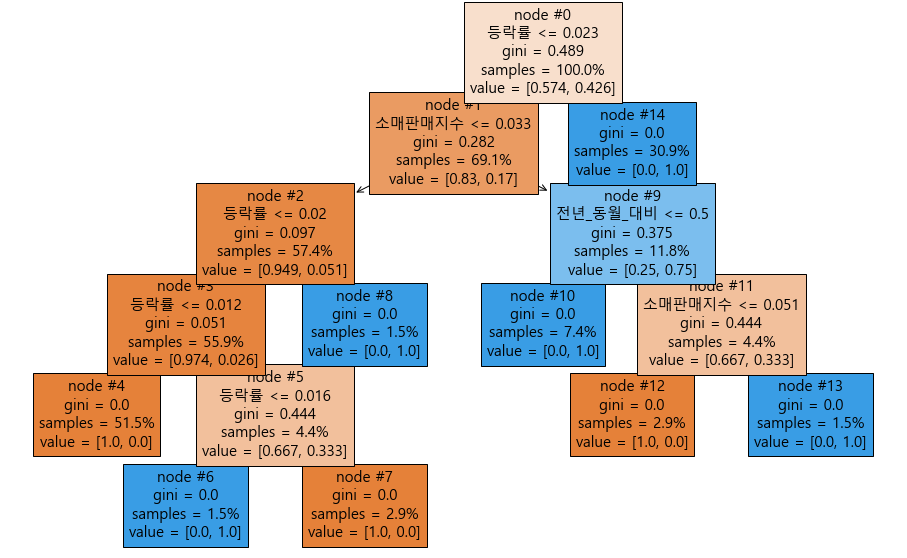

In [169]:
from sklearn.tree import plot_tree

feature_names = ["날짜", "등락률", "소비자물가지수", "소매판매지수", "전체_평균_대비", "전년_동월_대비"]

plt.rcParams["font.family"] = "Malgun Gothic"

plt.figure(figsize=(16,10))
plot_tree(df_clf, filled=True, feature_names=feature_names, node_ids=True, proportion=True)
plt.show()

In [162]:
df_clf.feature_importances_

array([0.        , 0.71496144, 0.        , 0.23493541, 0.        ,
       0.05010315])

<AxesSubplot:title={'center':'피처중요도'}>

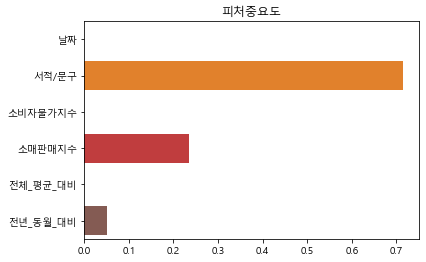

In [163]:
# 피처 중요도 시각화
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "Malgun Gothic"

plt.title("피처중요도")
sns.barplot(x=df_clf.feature_importances_, y=data.columns)